In [2]:
from meme_entity_detection.dataset.data_module import DataModule
from pathlib import Path
from IPython.display import clear_output
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data_dir = Path("../../../data/HVVMemes/")
dataset = DataModule(data_dir, balance_train_dataset=False)
dataset.setup("_")
clear_output(wait=False)

In [4]:
train_df = dataset.train_dataset.data_df
validation_df = dataset.validation_dataset.data_df
test_df  = dataset.test_dataset.data_df

# Concatenating all dataframes to get a combined view
combined_df = pd.concat([train_df.assign(dataset='train'), 
                         validation_df.assign(dataset='validation'), 
                         test_df.assign(dataset='test')])

# Number of samples per dataset

<Axes: xlabel='dataset'>

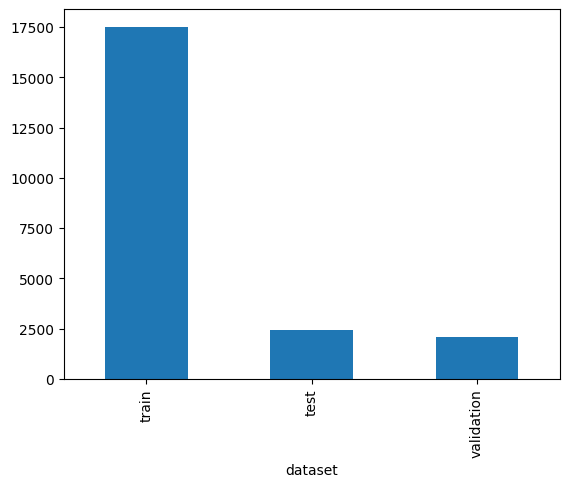

In [5]:
combined_df["dataset"].value_counts().plot(kind="bar")

# Check Class-Distribution on each dataset

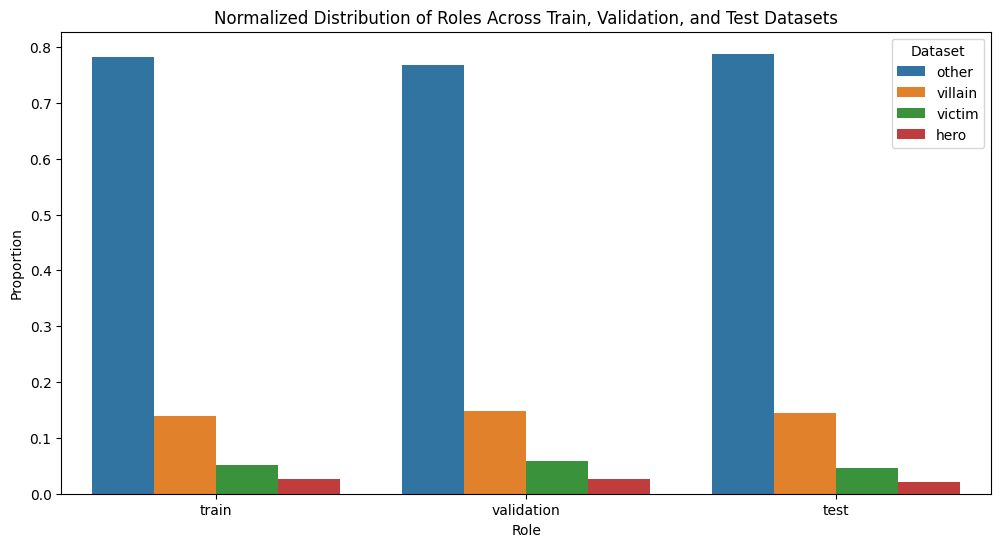

In [6]:
# Calculate the normalized counts
train_counts = train_df['role'].value_counts(normalize=True)
validation_counts = validation_df['role'].value_counts(normalize=True)
test_counts = test_df['role'].value_counts(normalize=True)

# Create a combined DataFrame with the normalized counts
normalized_df = pd.DataFrame({
    'role': train_counts.index.union(validation_counts.index).union(test_counts.index),
    'train': train_counts,
    'validation': validation_counts,
    'test': test_counts
}).fillna(0).melt(id_vars='role', var_name='dataset', value_name='proportion')

# Creating a barplot for the normalized distribution of the column "role" in all three datasets
plt.figure(figsize=(12, 6))
sns.barplot(data=normalized_df, x='dataset', y='proportion', hue='role')
plt.title('Normalized Distribution of Roles Across Train, Validation, and Test Datasets')
plt.xlabel('Role')
plt.ylabel('Proportion')
plt.legend(title='Dataset')
plt.show()

# Distribution of words

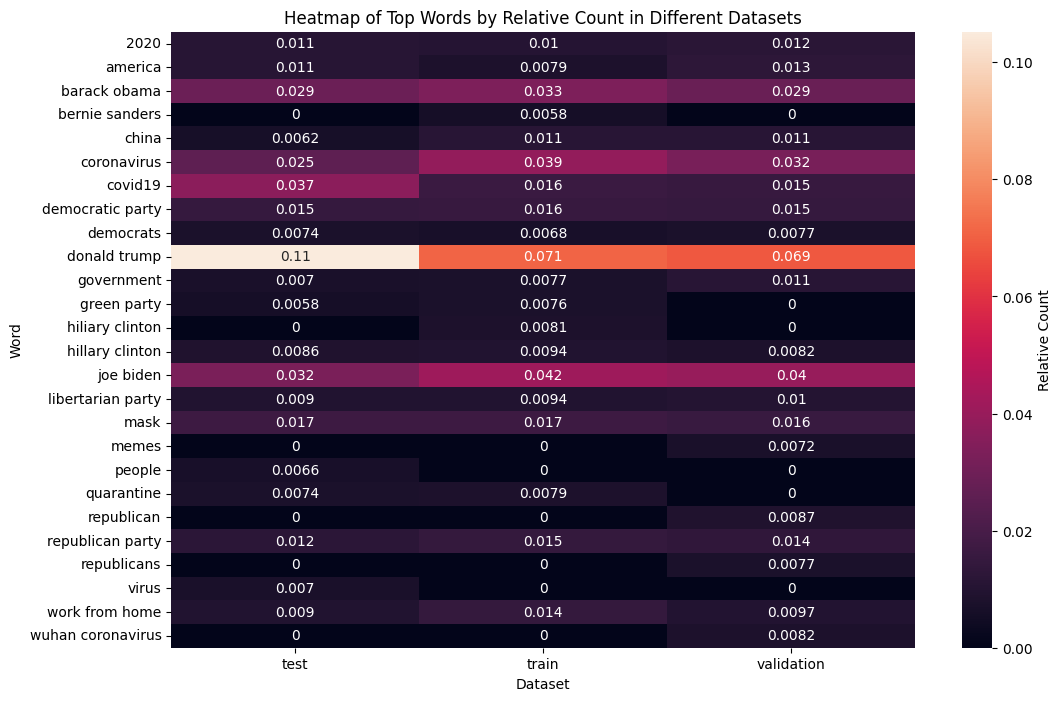

In [7]:
# Function to calculate top 10 words by relative count
def top_x_words_relative(df, dataset_name, nb_words=20):
    word_counts = df['word'].value_counts(normalize=True).head(nb_words)
    top_words_df = pd.DataFrame(word_counts).reset_index()
    top_words_df.columns = ['word', 'relative_count']
    top_words_df['dataset'] = dataset_name
    return top_words_df

# Calculate top 10 words for each dataset
train_top_words = top_x_words_relative(train_df, 'train')
validation_top_words = top_x_words_relative(validation_df, 'validation')
test_top_words = top_x_words_relative(test_df, 'test')

# Combine all top words into one DataFrame
combined_top_words = pd.concat([train_top_words, validation_top_words, test_top_words])

# Create a pivot table for the heatmap
pivot_df = combined_top_words.pivot(index="word", columns="dataset", values="relative_count").fillna(0)

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_df, annot=True, cbar_kws={'label': 'Relative Count'})
plt.title('Heatmap of Top Words by Relative Count in Different Datasets')
plt.xlabel('Dataset')
plt.ylabel('Word')
plt.show()


# Distribution of Roles per word

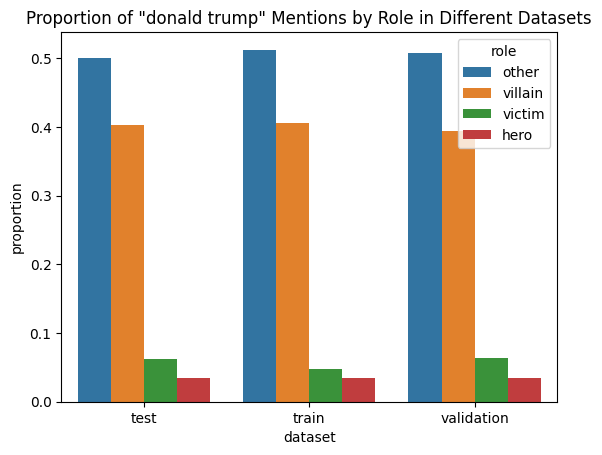

In [8]:
words_dataset_roles = combined_df.groupby(["word", "dataset"])["role"].value_counts(True).reset_index()
filtered_df = words_dataset_roles[words_dataset_roles["word"] == "donald trump"]

sns.barplot(data=filtered_df, x="dataset", y="proportion", hue="role")

# Add a title
plt.title('Proportion of "donald trump" Mentions by Role in Different Datasets')

# Display the plot
plt.show()


# Example Images

../../../data/HVVMemes/images/covid_memes_3922.png


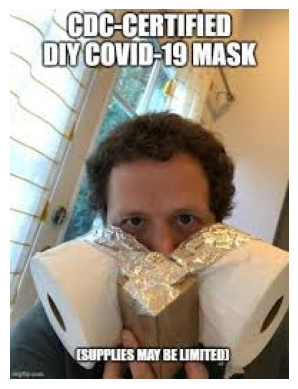

../../../data/HVVMemes/images/covid_memes_247.png


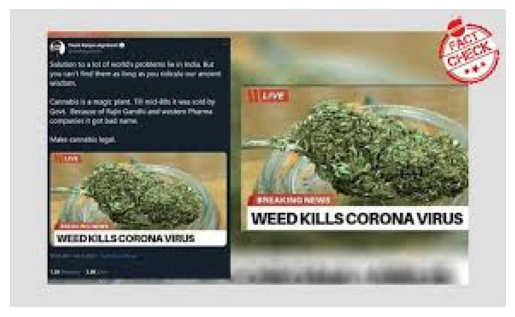

../../../data/HVVMemes/images/covid_memes_5113.png


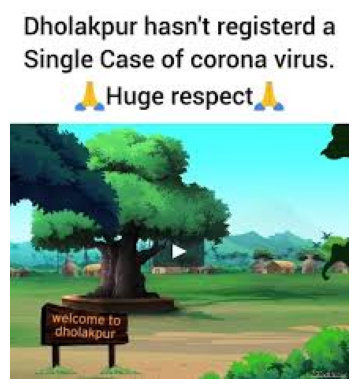

../../../data/HVVMemes/images/covid_memes_4024.png


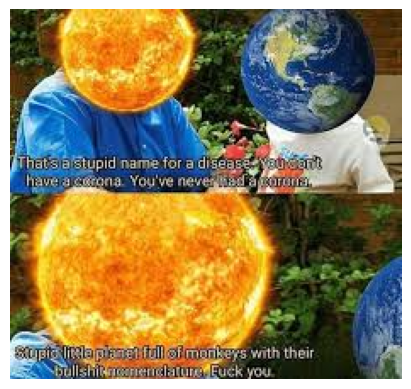

In [12]:
import matplotlib.pyplot as plt


for img_path in (str(data_dir) + "/images/" + combined_df["image"]).sample(10):
    try:
        img = plt.imread(img_path)
        print(img_path)
        plt.imshow(img)
        plt.axis('off')  # Turn off axis
        plt.show()
    except:
        None